In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Lab Goals:
   1. Get familiar with Graph Database Management Systems in NoSQL.
   2. Get familiar with Cypher Language.
   3. Compare between performance of MySQL database and Neo4J database

## Lab Tasks:
   1. Convert a RDBMS Schema to a Graph Schema. (0.5 Points)
   2. Perform some queries on the Graph database using Cypher Query Language. (1.5 Points)
   3. Compare MySQL to Neo4J. (3 Points)


# Introduction:
### Neo4J:
   <a href="https://neo4j.com/">Neo4J</a>  is a graph database management system developed by Neo4j, Inc. Described by its developers as a native graph storage and processing. It is the most popular graph database according to DB-Engines ranking, and the 22nd most popular database overall.
<img src="https://neo4j.com/wp-content/themes/neo4jweb/assets/images/neo4j-logo-2015.png">

## Pre-Lab:
### Installation
 1. Download the Neo4J <b>Community Server</b> from <a href="https://neo4j.com/download-center/#releases">here</a>. Follow the installation guide provided after the download for each operating system. <font color="red"> We have already downloaded the Neo4J on the Virtual Machine</font><br>
<b>To start the Neo4J server run the following command in the terminal:</b>
```
neo4j/bin/neo4j start
```

2. Install The Neo4j Python driver which is officially supported by Neo4j and connects to the database using the binary protocol. It aims to be minimal, while being idiomatic to Python. <a href="https://neo4j.com/developer/python/">here</a>:
```
pip install neo4j
```
<font color="red"> We have already installed neo4j library on this Machine</font>

In [3]:
! pip install neo4j

   ---------------------------------------- 0.0/301.7 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.7 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.7 kB 326.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.7 kB 508.4 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.7 kB 535.8 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/301.7 kB 522.9 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.7 kB 655.1 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/301.7 kB 654.9 kB/s eta 0:00:01
   -------------------------------------  297.0/301.7 kB 796.4 kB/s eta 0:00:01
   -------------------------------------- 301.7/301.7 kB 745.4 kB/s eta 0:00:00


In [1]:
from IPython.display import Image
# import the neo4j driver for Python
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import pandas as pd



## Task 1: Convert a RDB to a Graph DB
In this task, you are going to:
- Watch a Video explaining the advtanges of Graph Databases over RDBMS
- Convert a toy RDB into a Graph DB.
- Create the a graph of the toy database using Cyper Language

#### Watch the following video and mention some of the advantages of using Graph Databases over RDBMS

In [5]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/NO3C-CWykkY" frameborder="0" allowfullscreen></iframe>

<font color = "Red"><b>Advantages of Using Neo4J over RDBMS:</b></font>
<br> 1.Efficient Handling of Relationships:

- Neo4j is designed for complex, interconnected data. It can directly store and traverse relationships between nodes, making it highly efficient for queries involving deep relationships compared to RDBMS, which require expensive JOIN operations.

<br> 2.Flexible Schema:

- Neo4j has a schema-less structure, allowing for dynamic addition of data and relationships without the need for predefined tables

<br> 3.Faster Query Performance for Graph Data:

- Neo4j excels in querying graph data, with traversal-based queries operating in O(1) time complexity in many cases, compared to RDBMS queries that may have higher time complexity due to JOIN operations.

#### Given the following toy relational database, Convert this toy database into a Graph database using any drawing software.

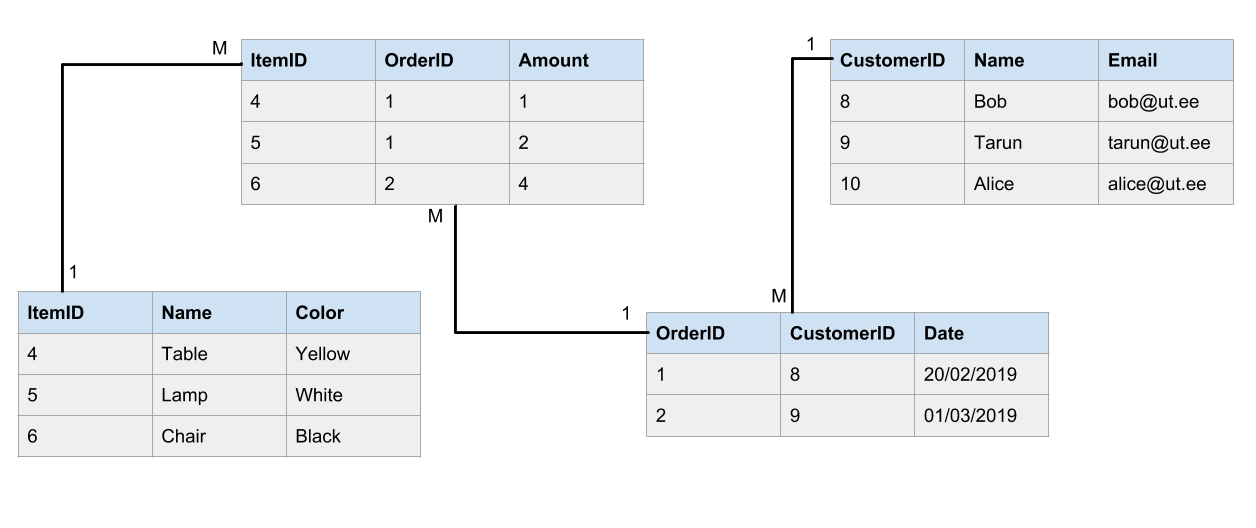

In [10]:
Image(filename='1.png')

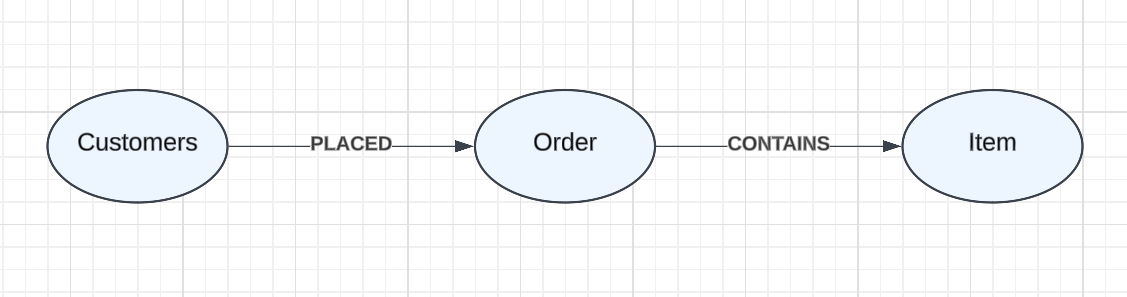

In [2]:
#  IMAGE HERE overveiw of the graph
Image(filename='Screenshot 2025-01-07 130316.png')

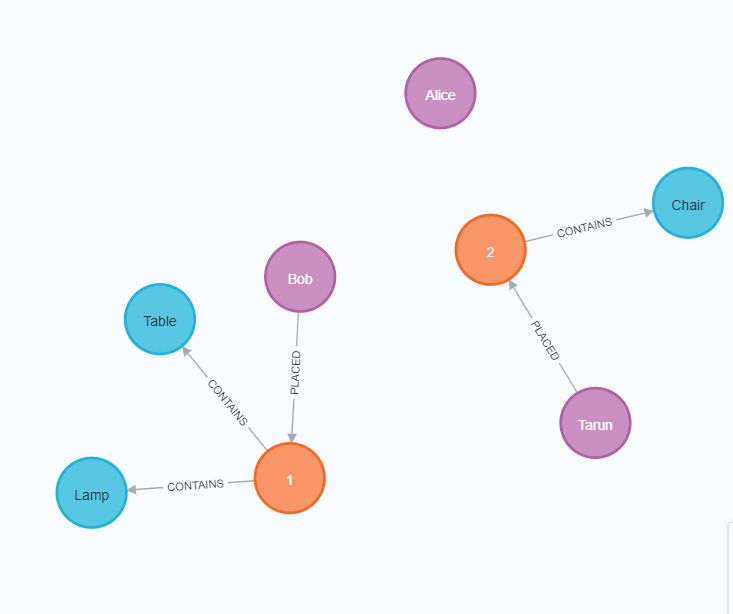

In [3]:
#  graph per instantane 
Image(filename='Screenshot 2025-01-01 165010.png')

#### 1) Start the Neo4J server locally
<b>To start the Neo4J server run the following command in the terminal and open neo4j server at http://localhost:7474/ to enter the login credentials:</b>
```
neo4j/bin/neo4j start
Default Username: neo4j
Default Password: testtest
```
<b> OR: run the following cell, then open the server url to enter the login credentials</b>

#### 2) Use Cypher Query Language to create the above Graph toy database, you have just drawed

In [4]:
# Database Credentials
uri = "bolt://localhost:7687"
userName = "neo4j" 
password = "testtest" 

# Connect to the neo4j database server
graphDB_Driver = GraphDatabase.driver(uri, auth=(userName, password))

In [5]:
# create a graph containing the graph created above
cqlCreate = """
CREATE
// Create Customers
(c1:Customer {CustomerID: 8, Name: 'Bob', Email: 'bob@ut.ee'}),
(c2:Customer {CustomerID: 9, Name: 'Tarun', Email: 'tarun@ut.ee'}),
(c3:Customer {CustomerID: 10, Name: 'Alice', Email: 'alice@ut.ee'}),

// Create Orders
(o1:Order {OrderID: 1}),
(o2:Order {OrderID: 2}),

// Create Items
(i1:Item {ItemID: 4, Name: 'Table', Color: 'Yellow'}),
(i2:Item {ItemID: 5, Name: 'Lamp', Color: 'White'}),
(i3:Item {ItemID: 6, Name: 'Chair', Color: 'Black'}),

// Create Relationships
// Bob places Order 1
(c1)-[:PLACED {Date: '20/02/2019'}]->(o1),
// Tarun places Order 2
(c2)-[:PLACED {Date: '01/03/2019'}]->(o2),

// Order 1 contains Table and Lamp
(o1)-[:CONTAINS {Amount: 1}]->(i1),
(o1)-[:CONTAINS {Amount: 2}]->(i2),
// Order 2 contains Chair
(o2)-[:CONTAINS {Amount: 4}]->(i3)
"""

# Execute the CQL query
with graphDB_Driver.session() as graphDB_Session:
    graphDB_Session.run(cqlCreate)

#### 3) Write a query to select all customer nodes in the graph

In [6]:
cqlNodeQuery = """
MATCH (c:Customer)
RETURN c
"""
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlNodeQuery) 
    for node in nodes:
        customer = node['c']  
        customer_id = customer['CustomerID']
        name = customer['Name']
        email = customer['Email']
        
        print(f"Customer ID: {customer_id}")
        print(f"Name: {name}")
        print(f"Email: {email}")
        print("-" * 30)  

Customer ID: 8
Name: Bob
Email: bob@ut.ee
------------------------------
Customer ID: 9
Name: Tarun
Email: tarun@ut.ee
------------------------------
Customer ID: 10
Name: Alice
Email: alice@ut.ee
------------------------------


#### 4) Write a query to select all relationships in the graph and print From node, to node, and relation amount

In [7]:
cqlEdgeQuery = """
MATCH (from)-[rel]->(to)
RETURN from, to, rel
"""

with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print("From Node:")
        print(f"  ID: {node['from'].element_id}")
        print(f"  Labels: {node['from'].labels}")
        print(f"  Properties: {dict(node['from'].items())}")
        
        print("\nTo Node:")
        print(f"  ID: {node['to'].element_id}")
        print(f"  Labels: {node['to'].labels}")
        print(f"  Properties: {dict(node['to'].items())}")
        
        print("\nRelationship:")
        print(f"  Type: {node['rel'].type}")
        print(f"  Properties: {dict(node['rel'].items())}")
        print("-" * 40)

        

From Node:
  ID: 4:00403b5c-dac5-4e69-b193-58a08cdb761c:98422
  Labels: frozenset({'Customer'})
  Properties: {'Email': 'bob@ut.ee', 'CustomerID': 8, 'Name': 'Bob'}

To Node:
  ID: 4:00403b5c-dac5-4e69-b193-58a08cdb761c:98425
  Labels: frozenset({'Order'})
  Properties: {'OrderID': 1}

Relationship:
  Type: PLACED
  Properties: {'Date': '20/02/2019'}
----------------------------------------
From Node:
  ID: 4:00403b5c-dac5-4e69-b193-58a08cdb761c:98423
  Labels: frozenset({'Customer'})
  Properties: {'Email': 'tarun@ut.ee', 'CustomerID': 9, 'Name': 'Tarun'}

To Node:
  ID: 4:00403b5c-dac5-4e69-b193-58a08cdb761c:98426
  Labels: frozenset({'Order'})
  Properties: {'OrderID': 2}

Relationship:
  Type: PLACED
  Properties: {'Date': '01/03/2019'}
----------------------------------------
From Node:
  ID: 4:00403b5c-dac5-4e69-b193-58a08cdb761c:98425
  Labels: frozenset({'Order'})
  Properties: {'OrderID': 1}

To Node:
  ID: 4:00403b5c-dac5-4e69-b193-58a08cdb761c:98427
  Labels: frozenset({'Ite

## Task 2: Perform some queries on the Graph database using Cypher Query Language.
In this task, you are going to:
- Import worldcup database
- Perform Several Quereis on the database

### worldcup.db
##### Connect to the WorldCup Database using the following Code snippet
##### Write the Cypher Query which will perform each of the following tasks

In [8]:
# Database Credentials
uri = "bolt://localhost:7687" 
userName = "neo4j" 
password = "testtest" 

# Connect to the neo4j database server
graphDB_Driver = GraphDatabase.driver(uri, auth=(userName, password))

#### The schema of the DB:

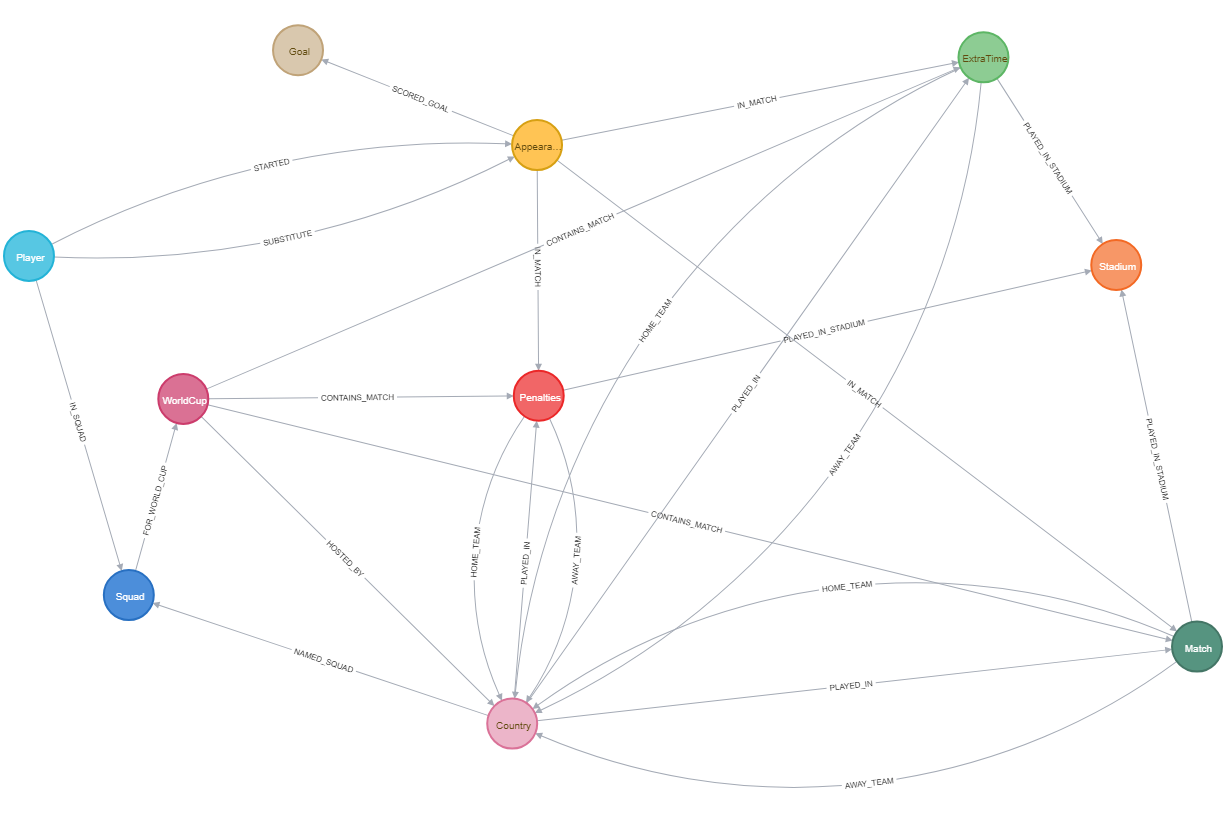

In [ ]:
Image(filename='/home/cloudera/img/week8-graph.png')

#### Another simplified Schema with labels of nodes:

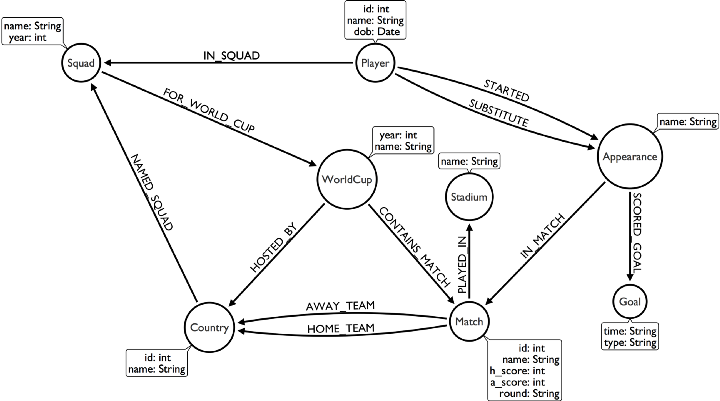

In [ ]:
Image(filename='/home/cloudera/img/week8-graph2.png')



#### 1 - Who hosted the world cup?

In [9]:
## YOUR CODE HERE ##
cqlEdgeQuery =  """
MATCH (wc:WorldCup)-[:HOSTED_BY]->(country)
RETURN wc.name, wc.year, collect(country.name) AS countries
ORDER BY wc.year
"""

with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(f"World Cup: {node['wc.name']}, Year: {node['wc.year']}, Hosted by: {', '.join(node['countries'])}")



World Cup: 1930 FIFA World Cup Uruguay, Year: 1930, Hosted by: Uruguay
World Cup: 1934 FIFA World Cup Italy, Year: 1934, Hosted by: Italy
World Cup: 1938 FIFA World Cup France, Year: 1938, Hosted by: France
World Cup: 1950 FIFA World Cup Brazil, Year: 1950, Hosted by: Brazil
World Cup: 1954 FIFA World Cup Switzerland, Year: 1954, Hosted by: Switzerland
World Cup: 1958 FIFA World Cup Sweden, Year: 1958, Hosted by: Sweden
World Cup: 1962 FIFA World Cup Chile, Year: 1962, Hosted by: Chile
World Cup: 1966 FIFA World Cup England, Year: 1966, Hosted by: England
World Cup: 1970 FIFA World Cup Mexico, Year: 1970, Hosted by: Mexico
World Cup: 1974 FIFA World Cup Germany, Year: 1974, Hosted by: Germany FR
World Cup: 1978 FIFA World Cup Argentina, Year: 1978, Hosted by: Argentina
World Cup: 1982 FIFA World Cup Spain, Year: 1982, Hosted by: Spain
World Cup: 1986 FIFA World Cup Mexico, Year: 1986, Hosted by: Mexico
World Cup: 1990 FIFA World Cup Italy, Year: 1990, Hosted by: Italy
World Cup: 1994 F

#### 2 - Top scorers per world cup.

In [10]:
## YOUR CODE HERE ##
cqlEdgeQuery = """MATCH (player:Player)-->(stats)-[:SCORED_GOAL]->(goal),
      (stats)-[:IN_MATCH]->(match)<-[:CONTAINS_MATCH]-(wc:WorldCup)
WHERE goal.type IN ["goal", "penalty"]
WITH wc.year AS worldCup_year, player, COUNT(*) AS goals
ORDER BY worldCup_year, goals DESC
WITH worldCup_year, player.name AS TopScorer, goals
WHERE goals > 0
ORDER BY worldCup_year, goals DESC
WITH worldCup_year, COLLECT({TopScorer: TopScorer, goals: goals})[0] AS top_scorer
RETURN worldCup_year, top_scorer.TopScorer AS TopScorer, top_scorer.goals AS goals
ORDER BY worldCup_year

"""
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(f"the worldCup year is {node['worldCup_year']} and it's TopScorer {node['TopScorer']} with num of goals {node['goals']}")


the worldCup year is 1930 and it's TopScorer Guillermo Stabile with num of goals 8
the worldCup year is 1934 and it's TopScorer Oldrich Nejedly with num of goals 5
the worldCup year is 1938 and it's TopScorer Leonidas with num of goals 7
the worldCup year is 1950 and it's TopScorer Ademir with num of goals 8
the worldCup year is 1954 and it's TopScorer Sandor Kocsis with num of goals 11
the worldCup year is 1958 and it's TopScorer Just Fontaine with num of goals 13
the worldCup year is 1962 and it's TopScorer Drazen Jerkovic with num of goals 4
the worldCup year is 1966 and it's TopScorer Eusebio (Eusebio Da Silva Ferreira) with num of goals 9
the worldCup year is 1970 and it's TopScorer Gerd Mueller with num of goals 10
the worldCup year is 1974 and it's TopScorer Grzegorz Lato with num of goals 7
the worldCup year is 1978 and it's TopScorer Mario Kempes with num of goals 6
the worldCup year is 1982 and it's TopScorer Paolo Rossi with num of goals 6
the worldCup year is 1986 and it's 

#### 3 - Which countries have never won a match at a World Cup?

In [11]:
## YOUR CODE HERE ##
cqlEdgeQuery =  """
MATCH (c:Country)-[:NAMED_SQUAD]->(s:Squad)-[:FOR_WORLD_CUP]->(wc:WorldCup)-[:CONTAINS_MATCH]->(m:Match)
WHERE (m)-[:HOME_TEAM]->(c) OR (m)-[:AWAY_TEAM]->(c)
WITH c, COLLECT(m) AS matches
WHERE ALL(match IN matches WHERE 
  NOT ((match)-[:HOME_TEAM]->(c) AND match.h_score > match.a_score) AND
      NOT ((match)-[:AWAY_TEAM]->(c) AND match.a_score > match.h_score))
RETURN DISTINCT c.name AS Country

"""  
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(f"Country: {node['Country']}")

Country: Iceland
Country: Egypt
Country: Honduras
Country: New Zealand
Country: Serbia and Montenegro
Country: Togo
Country: Trinidad and Tobago
Country: Angola
Country: China PR
Country: Bolivia
Country: United Arab Emirates
Country: Canada
Country: Iraq
Country: El Salvador
Country: Kuwait
Country: Zaire
Country: Haiti
Country: Israel
Country: Dutch East Indies


#### 4 - Which stadium has hosted the most World Cup matches?

In [12]:
## YOUR CODE HERE ##
cqlEdgeQuery = """
MATCH (wc:WorldCup)-[:HOSTED_BY]->(country:Country)-[:PLAYED_IN]->(match:Match)-[:PLAYED_IN_STADIUM]->(stadium:Stadium)
RETURN stadium.name AS Stadium, COUNT(DISTINCT match) AS Matches
ORDER BY Matches DESC
LIMIT 1
"""
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(node['Stadium'])


Estadio Azteca


#### 5 - Which country has participated in the most World Cups?

In [13]:
## YOUR CODE HERE ##
cqlEdgeQuery =  """
MATCH (country:Country)-[:NAMED_SQUAD]->(squad:Squad)-[:FOR_WORLD_CUP]->(wc:WorldCup)
WITH country, COUNT(DISTINCT wc) AS worldCupCount
ORDER BY worldCupCount DESC
LIMIT 1
RETURN country.name AS Country, worldCupCount AS NumberOfWorldCups
""" 
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(node['Country'])
        print(node['NumberOfWorldCups'])

Brazil
21


#### 6 - Which hosts won the World Cup that they hosted?

In [14]:
## YOUR CODE HERE ##
cqlEdgeQuery = """
MATCH (match:Match {round: "Final"})<-[hostPlayed:PLAYED_IN]-(host:Country),
      (host)<-[:HOSTED_BY]-(worldCup),
      (worldCup)-[:CONTAINS_MATCH]->(match),
      (match)<-[oppositionPlayed:PLAYED_IN]-(opposition)
WHERE ((hostPlayed.score > oppositionPlayed.score) OR (hostPlayed.penalties > oppositionPlayed.score)) AND worldCup.year IS NOT NULL
RETURN host.name as host_name, worldCup.year as worldCup_year , hostPlayed.score + "-" + oppositionPlayed.score AS score, opposition.name as opposition_name
ORDER BY worldCup.year
"""
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        host_name = node['host_name']
        worldCup_year = node['worldCup_year']
        score = node['score']
        opposition_name = node['opposition_name']
        print(f"World Cup {worldCup_year}: {host_name} won by {score} againist {opposition_name}")

World Cup 1930: Uruguay won by 4-2 againist Argentina
World Cup 1934: Italy won by 2-1 againist Czechoslovakia
World Cup 1966: England won by 4-2 againist Germany FR
World Cup 1974: Germany FR won by 2-1 againist Netherlands
World Cup 1978: Argentina won by 3-1 againist Netherlands
World Cup 1998: France won by 3-0 againist Brazil


#### 7 - What's the highest number of goals scored in a World Cup match?


In [15]:
cqlEdgeQuery = """
MATCH (match:Match)-[:HOME_TEAM]->(home:Country),
      (match)-[:AWAY_TEAM]->(away:Country)
WHERE match.h_score IS NOT NULL AND match.a_score IS NOT NULL
WITH match, home.name AS home_team, away.name AS away_team, match.h_score AS home_score, match.a_score AS away_score, match.round AS round,
match.name AS match_name,match.h_score + match.a_score AS total_score
RETURN match_name AS match_name, home_team, home_score, away_score, away_team, round, total_score
ORDER BY total_score DESC
LIMIT 1
"""

with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(f"Match: {node['match_name']}")
        print(f"Round: {node['round']}")
        print(f"{ node['home_team']} {node['home_score']} - {node['away_score']} {node['away_team']}")
        print(f"Total score: {node['total_score']}")


Match: None
Round: Quarter-finals
Austria 7 - 5 Switzerland
Total score: 12


#### 8 - Top scorer playing in the 2018 World Cup.

In [16]:
## YOUR CODE HERE ##
cqlEdgeQuery =  """
MATCH (player:Player)-->(stats)-[:SCORED_GOAL]->(goal),
      (stats)-[:IN_MATCH]->(match)<-[:CONTAINS_MATCH]-(wc:WorldCup)
WHERE wc.year = 2018 AND goal.type IN ["goal", "penalty"]
WITH player, COUNT(*) AS goals
ORDER BY goals DESC
RETURN player.name AS TopScorer, goals
LIMIT 1
"""


with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        top_scorer = node['TopScorer']
        goals = node['goals']
        print(f"Top Scorer: {top_scorer} with {goals} goals")


Top Scorer: Harry Kane with 6 goals


#### 9 - Who hosted the World Cup more than once, and when?

In [17]:
## YOUR CODE HERE ##
cqlEdgeQuery =  """
MATCH (wc:WorldCup)-[:HOSTED_BY]->(country)
WITH country.name AS country_name, collect(wc.year) AS years
WHERE size(years) > 1
RETURN country_name, years
ORDER BY country_name
"""

with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        print(f"{node['country_name']} hosted the World Cup in the years: {node['years']}")


Brazil hosted the World Cup in the years: [2014, 1950]
France hosted the World Cup in the years: [1998, 1938]
Italy hosted the World Cup in the years: [1990, 1934]
Mexico hosted the World Cup in the years: [1986, 1970]


#### 10 - Top scorer playing in the 2018 World Cup

In [18]:
## YOUR CODE HERE ##
cqlEdgeQuery =  """
MATCH (player:Player)-->(stats)-[:SCORED_GOAL]->(goal),
      (stats)-[:IN_MATCH]->(match)<-[:CONTAINS_MATCH]-(wc:WorldCup)
WHERE wc.year = 2018 AND goal.type IN ["goal", "penalty"]
WITH player, COUNT(*) AS goals
ORDER BY goals DESC
RETURN player.name AS TopScorer, goals
LIMIT 1
"""

with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlEdgeQuery)
    for node in nodes:
        top_scorer = node['TopScorer']
        goals = node['goals']
        print(f"Top Scorer: {top_scorer} with {goals} goals")


Top Scorer: Harry Kane with 6 goals


## Task 3: Compare MySQL to Neo4J
In this task, you are going to:
 - Convert a MySQL Database to a Graph Database
 - Perform Some SQL queries on the Relational Database
 - Perform the same queries on the Graph Database
 - Compare the Time performance on each database

#### 1. Download the MySQL Database provided <a href = "https://github.com/datacharmer/test_db"> HERE </a>
#### 2. Follow the installation guide in the above URL
##### The DB schema can be found in the provided URL and it is shown also below:

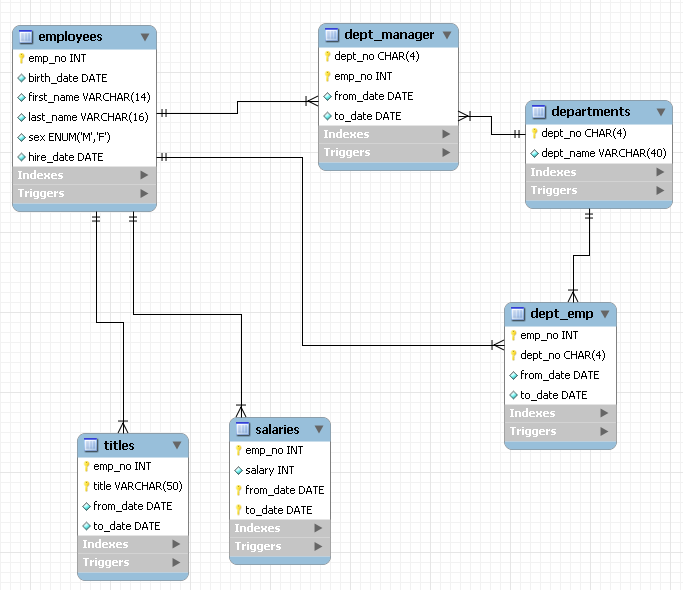

In [ ]:
Image(filename='/home/cloudera/img/week8-schemadb.png')

#### 3. Host The database locally using MySQL and Phpmyadmin on local apache server.
##### We have already installed all the needed tools (apache, phpmyadmin, and mysql)
##### To start the apache server run the following command

In [ ]:
! sudo service httpd restart

##### Visit Phpmyadmin using the following URL: <a href="http://127.0.0.1:8090/phpmyadmin">http://127.0.0.1:8090/phpmyadmin</a> and use the following login credentials:
<b>UserName:</b> root <br>
<b>Password:</b> test<br>
Then, start to import the database to use it in the following tasks

#### 4. Install <a href="https://pymysql.readthedocs.io/en/latest/index.html"> PyMySQL </a> library and use it to run the following queries
<font color="red"> We have already installed PyMySQL library on this Machine</font>

##### What is the highest Salary for an employee working in the Research department, and Finance department?
##### How many employees in the marketing department, and customer service department?
##### What is the average Salaries of the department Managers?

In [4]:
!pip install PyMySQL

In [ ]:
## YOUR CODE HERE ##

In [17]:
import pymysql
import time


In [18]:
# Establishing the connection
connection = pymysql.connect(
    host='localhost',
    port=3306, 
    user='root', 
    password='test',  
    database='employees' 
)

# Creating a cursor object to execute queries
cursor = connection.cursor()


##### What is the highest Salary for an employee working in the Research department, and Finance department?

In [19]:

start_time = time.time()

query = """
SELECT d.dept_name, MAX(s.salary) AS max_salary
FROM salaries AS s, employees AS e, departments AS d, dept_emp AS de 
WHERE d.dept_name IN ('Finance', 'Research') 
  AND s.emp_no = e.emp_no 
  AND de.emp_no = e.emp_no 
  AND d.dept_no = de.dept_no
GROUP BY d.dept_name;
"""

cursor.execute(query)

results = cursor.fetchall()

for row in results:
    print(f"Department: {row[0]}, Highest Salary: {row[1]}")

end_time = time.time()

execution_time = end_time - start_time
print(f"Query executed in {execution_time:.2f} seconds.")

Department: Finance, Highest Salary: 134662
Department: Research, Highest Salary: 124181
Query executed in 0.54 seconds.


##### How many employees in the marketing department, and customer service department?¶

In [20]:
start_time = time.time()

query = """
SELECT d.dept_name ,COUNT(DISTINCT e.emp_no)
FROM employees AS e , departments AS d , dept_emp as de
WHERE d.dept_name IN ('Marketing', 'Customer Service')  and de.dept_no = d.dept_no and e.emp_no= de.emp_no
GROUP BY  d.dept_name
"""
cursor.execute(query)

results = cursor.fetchall()

for row in results:
    print(f"Department: {row[0]}, Has Employee count: {row[1]}")
    
end_time = time.time()

# Calculate and print the time taken
execution_time = end_time - start_time
print(f"Query executed in {execution_time} seconds.")

Department: Customer Service, Has Employee count: 23580
Department: Marketing, Has Employee count: 20211
Query executed in 0.6146044731140137 seconds.


##### What is the average Salaries of the department Managers?

In [21]:
start_time = time.time()

query = """
SELECT AVG(s.salary) AS average_salary
FROM employees AS e , salaries AS s,dept_manager AS dm, departments AS d
where  e.emp_no = s.emp_no and e.emp_no = dm.emp_no and dm.dept_no = d.dept_no
"""

cursor.execute(query)

result =cursor.fetchone()
average_salary = result[0] 

print(f"Average Salary: {float(average_salary):.2f}") 
end_time = time.time()

# Calculate and print the time taken
execution_time = end_time - start_time
print(f"Query executed in {execution_time} seconds.")

Average Salary: 66924.27
Query executed in 0.03137469291687012 seconds.


In [22]:
start_time = time.time()

query = """
SELECT d.dept_name, AVG(s.salary) AS average_salary
FROM employees AS e , salaries AS s,dept_manager AS dm, departments AS d
where  e.emp_no = s.emp_no and e.emp_no = dm.emp_no and dm.dept_no = d.dept_no
GROUP BY d.dept_name;
"""

cursor.execute(query)

results = cursor.fetchall()

for result in results:
    print(f"Department: {result[0]}, Average Salary: {result[1]}")

end_time = time.time()

# Calculate and print the time taken
execution_time = end_time - start_time
print(f"Query executed in {execution_time} seconds.")

Department: Customer Service, Average Salary: 54959.6724
Department: Development, Average Salary: 59658.1176
Department: Finance, Average Salary: 70815.8889
Department: Human Resources, Average Salary: 58286.0556
Department: Marketing, Average Salary: 88371.6857
Department: Production, Average Salary: 56233.4000
Department: Quality Management, Average Salary: 67130.9355
Department: Research, Average Salary: 77535.1818
Department: Sales, Average Salary: 85738.7647
Query executed in 0.028058528900146484 seconds.


In [23]:
if cursor:
    cursor.close()
if connection:
    connection.close()

#### 5. Write Cypher Code suitable for converting the MySQL Database into a Graph Database


In [24]:
# MySQL Connection
mysql_conn = pymysql.connect(
    host='localhost',
    port=3306,
    user='root',
    password='test',
    database='employees'
)

# Neo4j Connection
neo4j_driver = GraphDatabase.driver(
    uri="bolt://localhost:7687",  
    auth=("neo4j", "testtest")   
)

# Function to fetch data from MySQL
def fetch_data(query):
    with mysql_conn.cursor() as cursor:
        cursor.execute(query)
        return cursor.fetchall(), [desc[0] for desc in cursor.description]

# Function to insert data into Neo4j
def insert_into_neo4j(query, parameters=None):
    with neo4j_driver.session() as session:
        session.run(query, parameters)


In [26]:
# 1. Create Employee Nodes
employees_query = "SELECT emp_no, birth_date, first_name, last_name, gender, hire_date FROM employees;"
employees_data, employees_columns = fetch_data(employees_query)
employees_df = pd.DataFrame(employees_data, columns=employees_columns)

for _, row in employees_df.iterrows():
    data = row.to_dict()  
    insert_into_neo4j(
        """
        CREATE (:Employee {emp_no: $emp_no, birth_date: $birth_date, first_name: $first_name, 
                           last_name: $last_name, gender: $gender, hire_date: $hire_date})
        """,
        data 
    )


In [27]:
# 2. Create Department Nodes
departments_query = "SELECT * FROM departments;"
departments_data, departments_columns = fetch_data(departments_query)
departments_df = pd.DataFrame(departments_data, columns=departments_columns)

for _, row in departments_df.iterrows():
    insert_into_neo4j(
        """
        CREATE (:Department {dept_no: $dept_no, dept_name: $dept_name})
        """,
        row.to_dict()
    )

In [28]:
# 3. Create WORKS_IN Relationships
dept_emp_query = "SELECT * FROM dept_emp;"
dept_emp_data, dept_emp_columns = fetch_data(dept_emp_query)
dept_emp_df = pd.DataFrame(dept_emp_data, columns=dept_emp_columns)
for _, row in dept_emp_df.iterrows():
    insert_into_neo4j(
        """
        MATCH (e:Employee {emp_no: $emp_no}), (d:Department {dept_no: $dept_no})
        CREATE (e)-[:WORKS_IN {from_date: $from_date, to_date: $to_date}]->(d)
        """,
        row.to_dict()
    )


In [29]:
# 4. Create MANAGES Relationships
dept_manager_query = "SELECT * FROM dept_manager;"
dept_manager_data, dept_manager_columns = fetch_data(dept_manager_query)
dept_manager_df = pd.DataFrame(dept_manager_data, columns=dept_manager_columns)

for _, row in dept_manager_df.iterrows():
    insert_into_neo4j(
        """
        MATCH (e:Employee {emp_no: $emp_no}), (d:Department {dept_no: $dept_no})
        CREATE (e)-[:MANAGES {from_date: $from_date, to_date: $to_date}]->(d)
        """,
        row.to_dict()
    )

In [30]:
# 5. Create Title Nodes

titles_query = "SELECT DISTINCT title FROM titles;"
titles_data, titles_columns = fetch_data(titles_query)
titles_df = pd.DataFrame(titles_data, columns=titles_columns)

for _, row in titles_df.iterrows():
    insert_into_neo4j(
        """
        MERGE (t:Title {title: $title})
        """,
        row.to_dict()
    )


In [31]:
# 4. Create HAS_TITLE Relationships

titles_query = "SELECT * FROM titles;"
titles_data, titles_columns = fetch_data(titles_query)
titles_df = pd.DataFrame(titles_data, columns=titles_columns)

for _, row in titles_df.iterrows():
    insert_into_neo4j(
        """
        MATCH (e:Employee {emp_no: $emp_no})
        MATCH (t:Title {title: $title})
        CREATE (e)-[:HAS_TITLE {from_date: $from_date, to_date: $to_date}]->(t)
        """,
        row.to_dict()
    )


In [32]:
# 5. Create Salary Nodes
salaries_query = "SELECT DISTINCT salary FROM salaries;"
salaries_data, salaries_columns = fetch_data(salaries_query)
salaries_df = pd.DataFrame(salaries_data, columns=salaries_columns)

for _, row in salaries_df.iterrows():
    insert_into_neo4j(
        """
        MERGE (s:Salary {amount: $salary})
        """,
        {"salary": row["salary"]}
    )


In [33]:
# 6. Create HAS_SALARY Relationships
salaries_query = "SELECT * FROM salaries;"
salaries_data, salaries_columns = fetch_data(salaries_query)
salaries_df = pd.DataFrame(salaries_data, columns=salaries_columns)

for _, row in salaries_df.iterrows():
    insert_into_neo4j(
        """
        MATCH (e:Employee {emp_no: $emp_no})
        MATCH (s:Salary {amount: $salary})
        CREATE (e)-[:HAS_SALARY {from_date: $from_date, to_date: $to_date}]->(s)
        """,
        row.to_dict()
    )


In [34]:
# Close Connections
mysql_conn.close()

print("Migration completed successfully!")

Migration completed successfully!


#### I have tried Neo4j etl tool too 


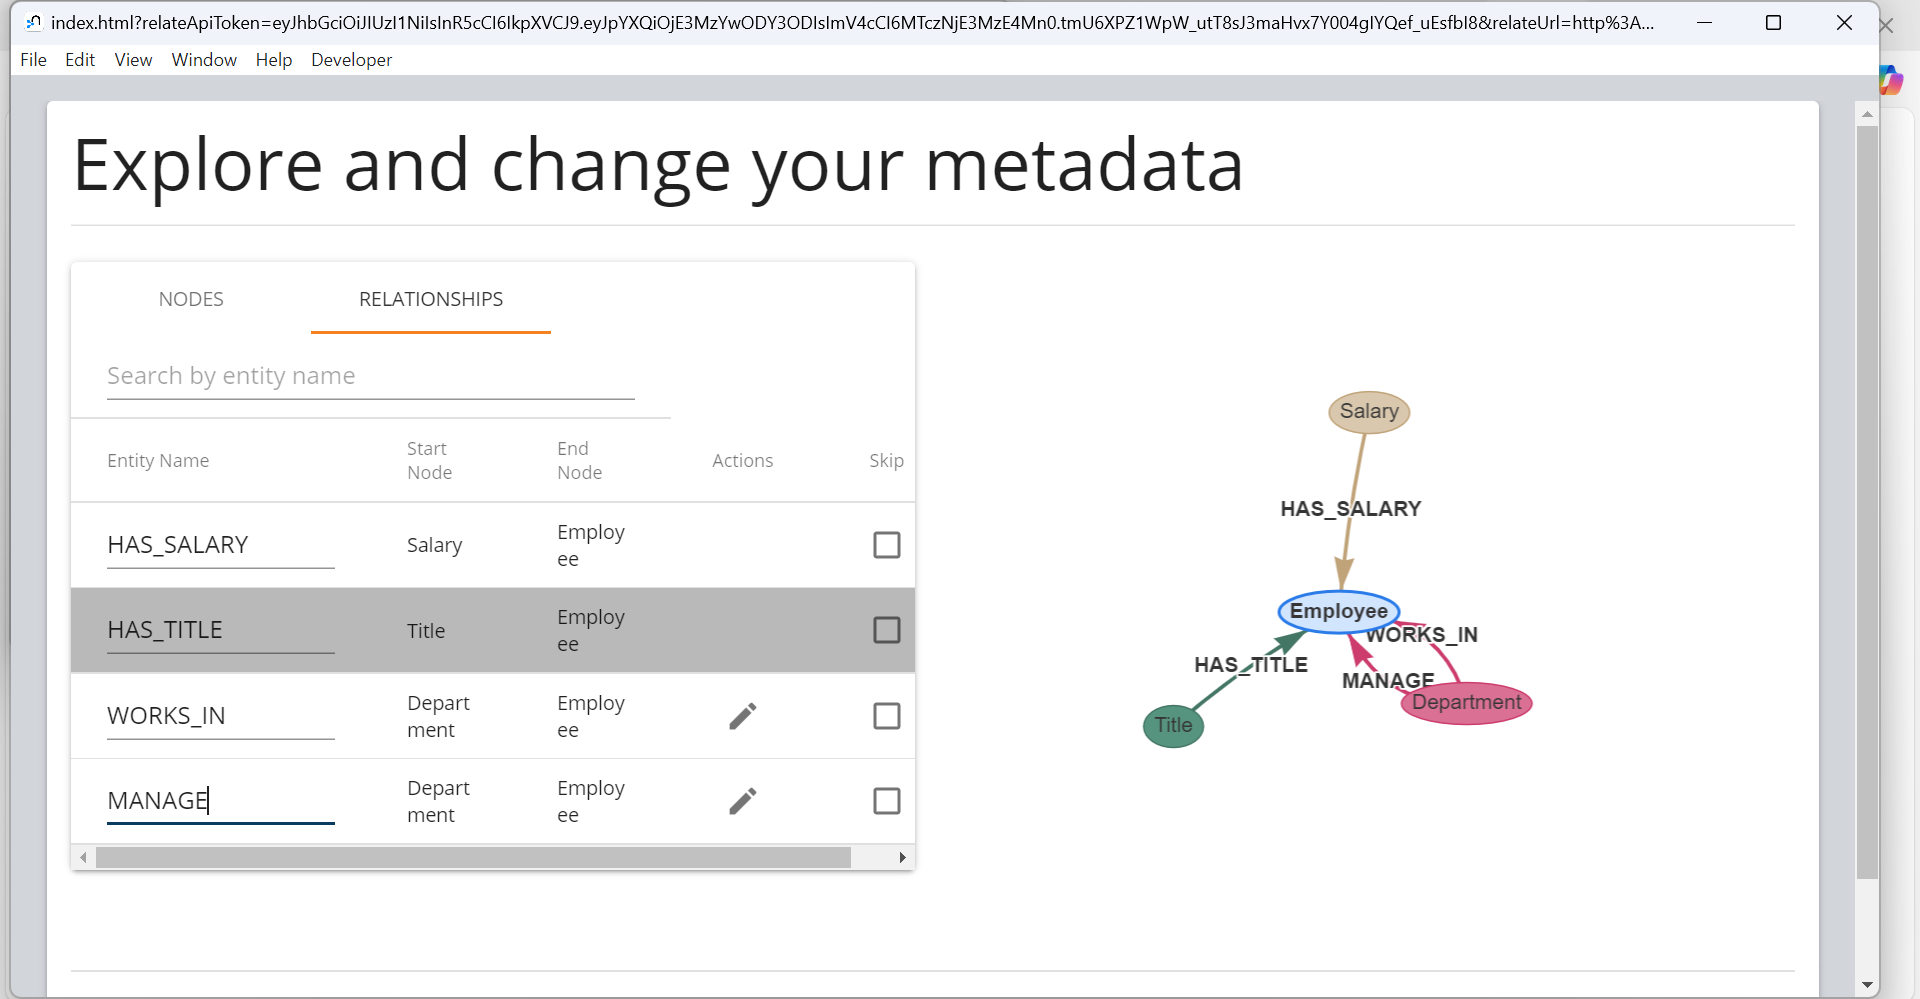

In [35]:
Image(filename='Screenshot (137).png')

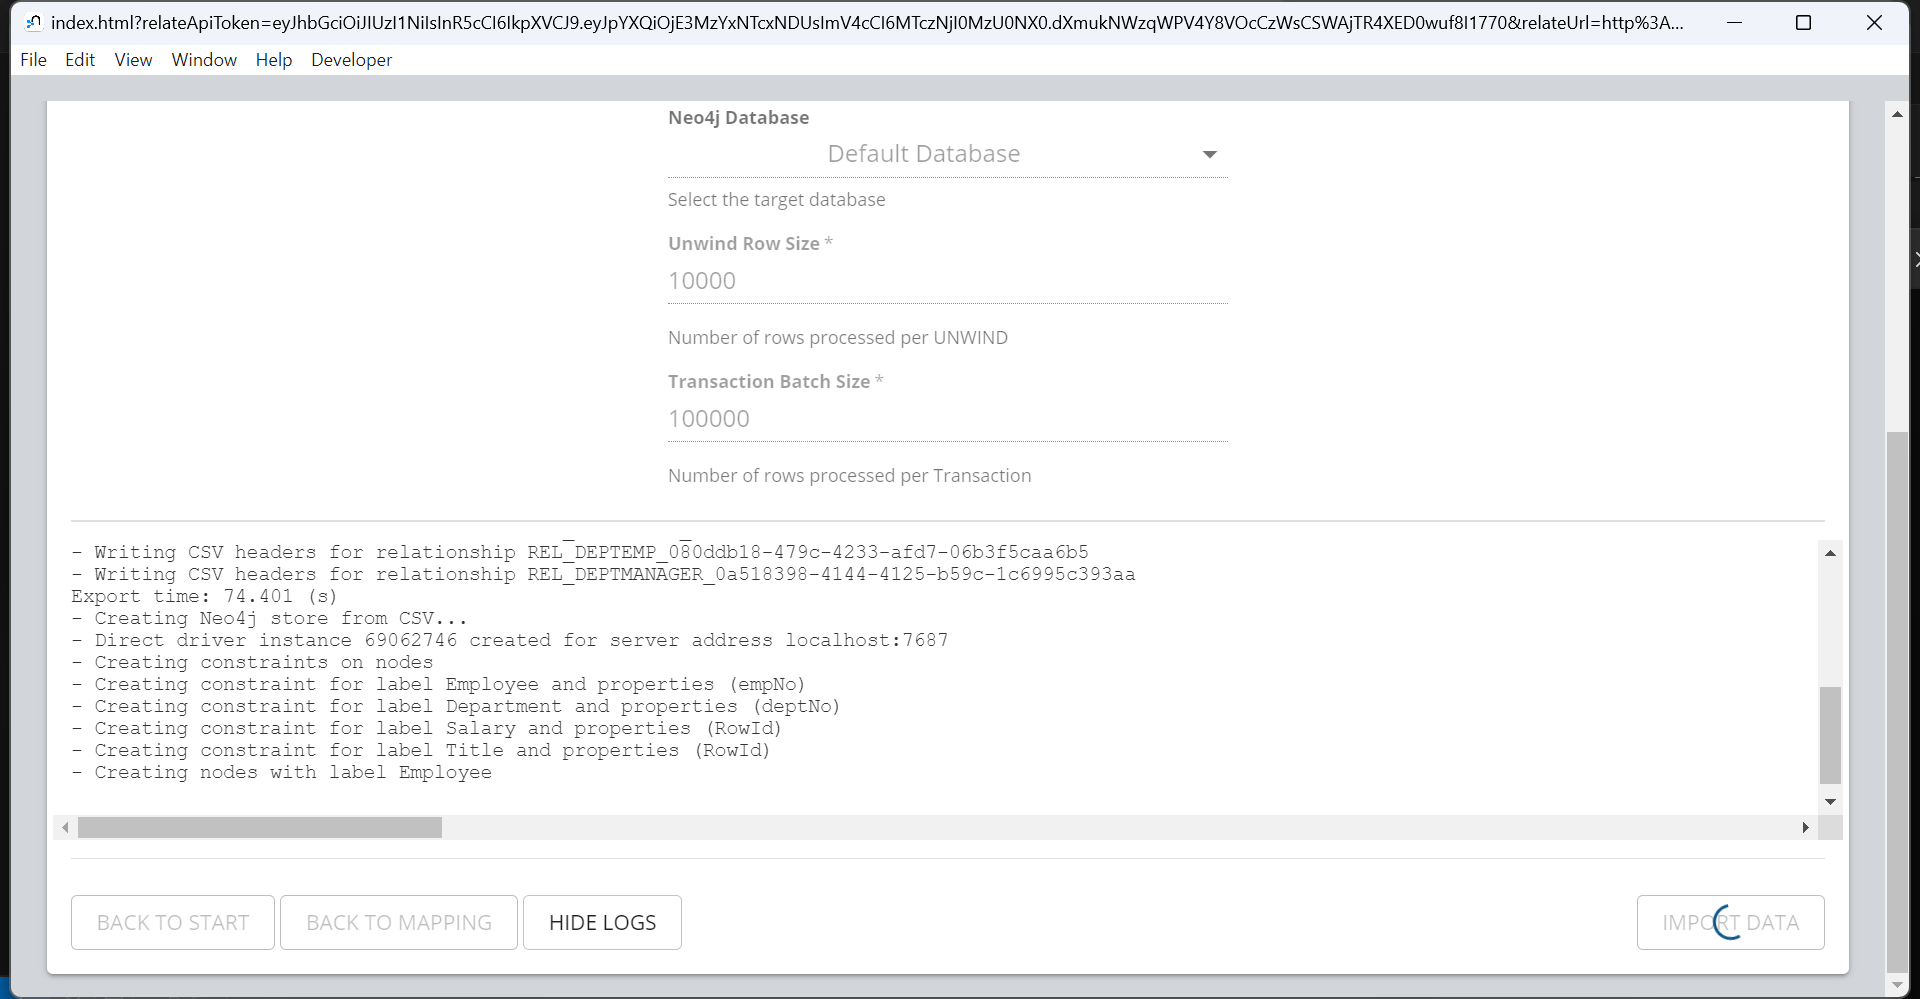

In [36]:
Image(filename='Screenshot (138).png')

#### 6. Peform the same previous queries


##### What is the highest Salary for an employee working in the Research department, and Finance department?

In [37]:
cqlEdgeQuery =  """
MATCH (e:Employee)-[:WORKS_IN]->(d:Department),(e)-[:HAS_SALARY]->(s:Salary)
WHERE d.dept_name IN ['Finance', 'Research']
RETURN d.dept_name AS Department, MAX(s.amount) AS max_salary
"""

with neo4j_driver.session() as neo4j_Session:
    start_time = time.time()
    nodes = neo4j_Session.run(cqlEdgeQuery)
    
    end_time = time.time()

    # Calculate and print the time taken
    execution_time = end_time - start_time
    print(f"Query executed in {execution_time} seconds.")
    for node in nodes:
        print(f"the highest salary in  department {node["Department"]} is {node["max_salary"]} ")


Query executed in 0.01923656463623047 seconds.
the highest salary in  department Finance is 134662 
the highest salary in  department Research is 124181 


##### How many employees in the marketing department, and customer service department?¶

In [38]:
cqlEdgeQuery =  """
MATCH (e:Employee)-[:WORKS_IN]->(d:Department)
WHERE d.dept_name IN ['Marketing', 'Customer Service']  
RETURN  d.dept_name AS Department, COUNT(DISTINCT e) AS EmployeeCount
"""

with neo4j_driver.session() as neo4j_Session:
    start_time = time.time()
    nodes = neo4j_Session.run(cqlEdgeQuery)
    
    end_time = time.time()

    # Calculate and print the time taken
    execution_time = end_time - start_time
    print(f"Query executed in {execution_time} seconds.")
    for node in nodes:
        print(f"EmployeeCount in   department {node["Department"]} is : {node["EmployeeCount"]}")

Query executed in 0.015998363494873047 seconds.
EmployeeCount in   department Customer Service is : 23580
EmployeeCount in   department Marketing is : 20211


##### What is the average Salaries of the department Managers?

In [39]:
cqlEdgeQuery = """
MATCH (e:Employee)-[:MANAGES]->(d:Department),
      (e)-[:HAS_SALARY]->(s:Salary)
      RETURN AVG(s.amount) AS OverallAverageSalary
"""

with neo4j_driver.session() as neo4j_Session:
    start_time = time.time()
    node = neo4j_Session.run(cqlEdgeQuery)
    node = node.single()
    end_time = time.time()

    # Calculate and print the time taken
    execution_time = end_time - start_time
    print(f"Query executed in {execution_time} seconds.")
    print(f"AverageSalary :{node['OverallAverageSalary']}")

Query executed in 0.03140974044799805 seconds.
AverageSalary :66924.27061855674


In [40]:
cqlEdgeQuery =  """
MATCH (e:Employee)-[:MANAGES]->(d:Department),
      (e)-[:HAS_SALARY]->(s:Salary)
RETURN d.dept_name AS Department, AVG(s.amount) AS AverageSalary
"""

with neo4j_driver.session() as neo4j_Session:
    start_time = time.time()
    nodes = neo4j_Session.run(cqlEdgeQuery)
    
    end_time = time.time()

    # Calculate and print the time taken
    execution_time = end_time - start_time
    print(f"Query executed in {execution_time} seconds.")
    for node in nodes:
        print(f"{node['Department']} Department has AverageSalary :{node['AverageSalary']}")

Query executed in 0.010422468185424805 seconds.
Customer Service Department has AverageSalary :54959.67241379311
Development Department has AverageSalary :59658.11764705881
Finance Department has AverageSalary :70815.88888888888
Human Resources Department has AverageSalary :58286.055555555555
Marketing Department has AverageSalary :88371.68571428572
Production Department has AverageSalary :56233.399999999994
Quality Management Department has AverageSalary :67130.93548387096
Research Department has AverageSalary :77535.18181818182
Sales Department has AverageSalary :85738.76470588238


In [41]:
neo4j_driver.close()


#### 7. Measure the Time taken for each query to be done in both cases (MySQL, CQL) and make a plot to visualize the time difference

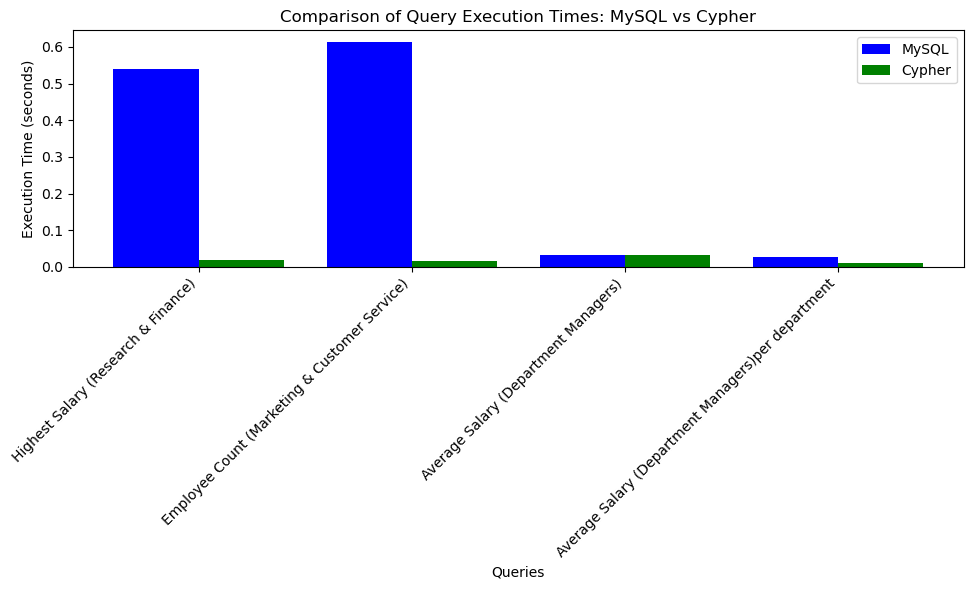

In [42]:
import numpy as np

# Data for MySQL and Cypher queries
mysql_queries = [
    ("Highest Salary (Research & Finance)",  0.54),
    ("Employee Count (Marketing & Customer Service)",0.6146044731140137),
    ("Average Salary (Department Managers)",  0.03137469291687012),
    ("Average Salary (Department Managers)per department",  0.028058528900146484)

]

cql_queries = [
    ("Highest Salary (Research & Finance)", 0.01923656463623047 ),
    ("Employee Count (Marketing & Customer Service)", 0.015998363494873047),
    ("Average Salary (Department Managers)", 0.03140974044799805),
    ("Average Salary (Department Managers)per department", 0.010422468185424805)

]

# Extracting the query names and execution times
mysql_names = [query[0] for query in mysql_queries]
mysql_times = [query[1] for query in mysql_queries]

cql_names = [query[0] for query in cql_queries]
cql_times = [query[1] for query in cql_queries]

# Plotting the data
x = np.arange(len(mysql_queries))

plt.figure(figsize=(10, 6))

# Plot MySQL execution times
plt.bar(x - 0.2, mysql_times, 0.4, label='MySQL', color='blue')

# Plot Cypher execution times
plt.bar(x + 0.2, cql_times, 0.4, label='Cypher', color='green')

# Adding labels and title
plt.xlabel('Queries')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Query Execution Times: MySQL vs Cypher')
plt.xticks(x, mysql_names, rotation=45, ha="right")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
